In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import sort
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from time import time
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics,preprocessing
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [33]:
directory = os.fsencode('../data/')

location = True  #range location
mean_dopp = False  #mean of doppler spectrum
var_dopp = True  #variance of doppler spectrum, normalized by total power and square of number of bins
SPC_Hi = True  #scattering point cloud, high threshold
SPD = True #scattering point difference, high threshold
MDR = True #magnitude difference rate
strength = True #sum of doppler spectrum
max_dev = True #deviation from maximum in doppler spectrum (maybe same as var_dopp)
SPC_Lo = True #scattering point cloud, low threshold
peak_count = True #peak count
std_deviation = True #var_dopp difference rate
harmonic_power_content = True #power content of minor peaks in doppler spectrum
frame_counter = False #frame reference of each sample, just for visualization, not a feature
correlation = True
max_to_mean_distance = True
peak_strength_std = False
Lo_peak_count = True
Lo_harmonic_power_content = True
SPC_Mi = True
Lo_skewness = True
Lo_skewness_variation = True
Hi_deviation = True
Hi_deviation_difference = True
Mi_peak_count = True
Mi_harmonic_power_content = True
Mi_skewness = True
Mi_skewness_difference = True
Hi_skewness = True
Hi_skewness_difference = True
Lo_skewness_mean = True
Side_lobe_strength = True
Side_lobe_max_strength = True
SPC_Lo_skewness = True
SPC_Mi_Hi_skewness = True
SPC_Mi_variance = True



feature_list = {'location':location,'mean_dopp':mean_dopp,'var_dopp':var_dopp,'SPC_Hi':SPC_Hi,'SPD':SPD,\
                'MDR':MDR,'strength':strength,'max_dev':max_dev,'SPC_Lo':SPC_Lo,'peak_count':peak_count,\
               'std_deviation':std_deviation,'harmonic_power_content':harmonic_power_content,'frame_counter':frame_counter,\
                'correlation':correlation,'max_to_mean_distance':max_to_mean_distance,'peak_strength_std':peak_strength_std,\
                'Lo_peak_count':Lo_peak_count,'Lo_harmonic_power_content':Lo_harmonic_power_content,"SPC_Mi":SPC_Mi,"Lo_skewness":Lo_skewness,\
                "Lo_skewness_variation":Lo_skewness_variation,"Hi_deviation":Hi_deviation,"Hi_deviation_difference":Hi_deviation_difference,\
               'Mi_peak_count':Mi_peak_count,'Mi_harmonic_power_content':Mi_harmonic_power_content,'Mi_skewness':Mi_skewness,\
                'Mi_skewness_difference':Mi_skewness_difference,'Hi_skewness':Hi_skewness,'Hi_skewness_difference':Hi_skewness_difference,\
               'Lo_skewness_mean':Lo_skewness_mean,'Side_lobe_strength': Side_lobe_strength,'Side_lobe_max_strength':Side_lobe_max_strength,\
               'SPC_Lo_skewness':SPC_Lo_skewness, 'SPC_Mi_Hi_skewness':SPC_Mi_Hi_skewness,'SPC_Mi_variance':SPC_Mi_variance}

class_number = 3
X = []
y = []
files = []
y = np.empty(1)
features = np.array([location, mean_dopp, var_dopp, SPC_Hi, SPD, MDR, strength, max_dev, SPC_Lo, peak_count, std_deviation, harmonic_power_content,\
                     frame_counter, correlation, max_to_mean_distance, peak_strength_std, Lo_peak_count, Lo_harmonic_power_content,SPC_Mi,Lo_skewness,\
                     Lo_skewness_variation,Hi_deviation,Hi_deviation_difference,Mi_peak_count,Mi_harmonic_power_content,Mi_skewness,Mi_skewness_difference,\
                    Hi_skewness,Hi_skewness_difference,Lo_skewness_mean,Side_lobe_strength,Side_lobe_max_strength,SPC_Lo_skewness,\
                    SPC_Mi_Hi_skewness,SPC_Mi_variance])
file_number = 0
X = np.zeros((1,sum(features)))
for file in sorted(os.listdir(directory)):
    filename = os.fsdecode(file)
    if filename.find('walking_diagonal_1_Dataset_1') == -1 and (filename.find('boresight_1') != -1 or filename.find('boresight_2') != -1\
                                                               or filename.find('diagonal_1') != -1 or filename.find('diagonal_2') != -1\
                                                               or filename.find('azimuth') != -1) and filename.find('azimuth_2_Dataset_2') == -1:
        path = os.path.join(os.fsdecode(directory), filename)
        print(path)                    
        data = pd.read_csv(path, sep='\t', header=None)
        print(data.values[:,:].shape)
        X = np.append(X,data.values[:,features], axis=0)
        if filename.startswith('walking_boresight'):
            i = 0
        elif filename.startswith('biking_boresight'):
            i = 1
        elif filename.startswith('driving_boresight'):
            i = 2
        elif filename.startswith('walking_diagonal'):
            i = 3
        elif filename.startswith('biking_diagonal'):
            i = 4
        elif filename.startswith('driving_diagonal'):
            i = 5
        elif filename.startswith('walking_azimuth'):
            i = 6
        elif filename.startswith('biking_azimuth'):
            i = 7
        elif filename.startswith('driving_azimuth'):
            i = 8
        y = np.append(y,i + np.zeros((data.shape[0],1)))
        
        file_number += 1
X = X[1:,:]
y = y[1:]
y = y - min(y) #reposition y from 0 to ....
print(X.shape)
print(y.shape)
feature_names = []
for feature in feature_list:
    if feature_list[feature] == True:
        feature_names.append(feature)
feature_names = np.array(feature_names)
print(f"Used : {file_number} files")
#for col in range(X.shape[1]):
#    X[:,col] /= max(X[:,col])

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=100)
#print(X_train.shape)
X_train = X
y_train = y

../data/biking_boresight_1_Dataset_1_statistics.txt
(104, 35)
../data/biking_boresight_1_Dataset_2_statistics.txt
(40, 35)
../data/biking_boresight_2_Dataset_1_statistics.txt
(101, 35)
../data/biking_boresight_2_Dataset_2_statistics.txt
(38, 35)
../data/driving_boresight_1_Dataset_1_statistics.txt
(58, 35)
../data/driving_boresight_1_Dataset_2_statistics.txt
(51, 35)
../data/driving_boresight_2_Dataset_1_statistics.txt
(59, 35)
../data/driving_boresight_2_Dataset_2_statistics.txt
(39, 35)
../data/walking_boresight_1_Dataset_1_statistics.txt
(109, 35)
../data/walking_boresight_1_Dataset_2_statistics.txt
(134, 35)
../data/walking_boresight_2_Dataset_1_statistics.txt
(110, 35)
../data/walking_boresight_2_Dataset_2_statistics.txt
(95, 35)
(938, 32)
(938,)
Used : 12 files


In [34]:
X = []
y = []
i = 0
files = []
y = np.empty(1)
X = np.zeros((1,sum(features)))
file_number = 0
for file in sorted(os.listdir(directory)):
    filename = os.fsdecode(file)
    if filename != 'No_target_out.txt' and (filename.find('boresight_3') != -1 or filename.find('diagonal_3') != -1 or filename.find('azimuth_2_Dataset_2') != -1):
        file_number += 1
        path = os.path.join(os.fsdecode(directory), filename)
        print(path)                    
        data = pd.read_csv(path, sep='\t', header=None)
        print(data.values[:,:].shape)
        X = np.append(X,data.values[:,features], axis=0)
        if filename.startswith('walking_boresight'):
            i = 0
        elif filename.startswith('biking_boresight'):
            i = 1
        elif filename.startswith('driving_boresight'):
            i = 2
        elif filename.startswith('walking_diagonal'):
            i = 3
        elif filename.startswith('biking_diagonal'):
            i = 4
        elif filename.startswith('driving_diagonal'):
            i = 5
        elif filename.startswith('walking_azimuth'):
            i = 6
        elif filename.startswith('biking_azimuth'):
            i = 7
        elif filename.startswith('driving_azimuth'):
            i = 8
        y = np.append(y,i + np.zeros((data.shape[0],1)))
X = X[1:,:]#/max(np.amax(dataset, axis = 0))
y = y[1:]
y = y - min(y)
print(X.shape)
print(y.shape)
X_test = X
y_test = y
print(f"Used : {file_number} files")

../data/biking_boresight_3_Dataset_1_statistics.txt
(78, 35)
../data/biking_boresight_3_Dataset_2_statistics.txt
(35, 35)
../data/driving_boresight_3_Dataset_1_statistics.txt
(57, 35)
../data/driving_boresight_3_Dataset_2_statistics.txt
(46, 35)
../data/walking_boresight_3_Dataset_1_statistics.txt
(136, 35)
../data/walking_boresight_3_Dataset_2_statistics.txt
(85, 35)
(437, 32)
(437,)
Used : 6 files


In [35]:
### Normalize dataset
X_dataset = np.append(X_train,X_test,axis=0)
scaler = preprocessing.StandardScaler().fit(X_dataset)
mean = scaler.mean_
scale = scaler.scale_
X_scaled = scaler.transform(X_dataset)
X_train = X_scaled[:len(y_train),:]
X_test = X_scaled[len(y_train):,:]
filename = 'boresight_diagonal_azimuth_norm_factors.csv'

data_to_file = pd.DataFrame([mean,scale])
print(data_to_file)
#data_to_file.to_csv(filename, sep='\t',index=False, header=True)
### Make cross validation set
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, train_size=0.80, test_size=0.20, random_state=100)
print(X_train.shape)

         0         1         2         3         4           5         6   \
0  0.530817  0.303253  0.063429  0.033693  0.543126  208.325026  0.111644   
1  0.207794  0.092612  0.045296  0.038714  0.619770  159.409419  0.025846   

         7         8         9   ...        22        23        24        25  \
0  0.297581  2.405818  0.073986  ...  0.000495  0.013567  0.000991  0.005801   
1  0.172259  2.663907  0.057437  ...  0.020598  0.022504  0.012516  0.016468   

         26        27        28        29        30        31  
0 -0.002439  0.577129  0.550014 -0.020036  0.063788  0.816142  
1  0.010985  0.116736  0.072482  0.157584  0.945576  0.929992  

[2 rows x 32 columns]
(938, 32)


In [36]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = [3, 5, 8, 10]
leaf_sizes = np.arange(20,51,5)

max_features = 20
kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=1)
scoring_by_n_features = []
total_time_tic = time()
for n_features in np.arange(1,max_features+1):
    print("Current number of features:" + str(n_features))
    time_per_feature_tic = time()
    best_params = {}
    best_score = 0
    for n_neigh in n_neighbors:
        for leaf_size in leaf_sizes:
            tic_fwd = time()
            svc = KNeighborsClassifier(n_neighbors=n_neigh,weights='distance',leaf_size=leaf_size)
            sfs= SequentialFeatureSelector(svc, scoring='accuracy',n_features_to_select=n_features,direction='forward')
            sfs.fit(X_train,y_train)
            select_X_train = sfs.transform(X_train)
            ###Train dataset accuracy
            results = cross_val_score(svc, select_X_train, y_train, cv=kfold)
            score = results.mean()
            standard_deviation = results.std()
            if score > best_score:
                best_params["n_neigh"] = n_neigh
                best_params["leaf_size"] = leaf_size
                best_params["features"] = feature_names[sfs.get_support()]
                best_params["support"] = sfs.get_support()
                best_params["standard_deviation"] = standard_deviation
                best_params["score"] = score
                best_score = score
            toc_fwd = time()
            print(f"Done in {toc_fwd - tic_fwd:.3f}s")
    time_per_feature_toc = time()
    print(f"Feature scan done in {(time_per_feature_toc - time_per_feature_tic)/60:.3f}m")
    scoring_by_n_features.append(best_params)
    
total_time_toc = time()
print(f"All process done in {(total_time_toc - total_time_tic)/60:.3f}m")

Current number of features:1
Done in 0.535s
Done in 0.527s
Done in 0.531s
Done in 0.623s
Done in 0.528s
Done in 0.531s
Done in 0.532s
Done in 0.482s
Done in 0.516s
Done in 0.542s
Done in 0.541s
Done in 0.540s
Done in 0.542s
Done in 0.553s
Done in 0.555s
Done in 0.558s
Done in 0.558s
Done in 0.559s
Done in 0.559s
Done in 0.560s
Done in 0.576s
Done in 0.567s
Done in 0.573s
Done in 0.575s
Done in 0.573s
Done in 0.572s
Done in 0.572s
Done in 0.589s
Feature scan done in 0.258m
Current number of features:2
Done in 1.043s
Done in 1.041s
Done in 1.040s
Done in 1.040s
Done in 1.039s
Done in 1.040s
Done in 1.058s
Done in 1.067s
Done in 1.068s
Done in 1.068s
Done in 1.069s
Done in 1.070s
Done in 1.069s
Done in 1.089s
Done in 1.103s
Done in 1.106s
Done in 1.110s
Done in 1.107s
Done in 1.106s
Done in 1.106s
Done in 1.136s
Done in 1.126s
Done in 1.133s
Done in 1.135s
Done in 1.133s
Done in 1.136s
Done in 1.133s
Done in 1.167s
Feature scan done in 0.509m
Current number of features:3
Done in 1.579s
Do

In [37]:
best_params_svm = {"score":0}
standard_deviation = []
test_scores = []
cv_scores = []
u = 0
for elem in scoring_by_n_features:
    u += 1
    print(f"Number of features: {u}")
    print(elem["features"])
    print(elem["n_neigh"])
    print(f"Cross-validation set score: {elem['score']}")
    if elem["score"] > best_params_svm["score"]:
        best_params_svm["score"] = elem["score"]
        best_params_svm["features"] = elem["features"]
        best_params_svm["leaf_size"] = elem["leaf_size"]
        best_params_svm["n_neigh"] = elem["n_neigh"]
        best_params_svm["support"] = elem["support"]
    svc = KNeighborsClassifier(n_neighbors=elem["n_neigh"],weights='distance',leaf_size=elem["leaf_size"])
    svc.fit(X_train[:,elem["support"]],y_train)
    y_pred = svc.predict(X_test[:,elem["support"]])
    score = metrics.accuracy_score(y_test, y_pred)
    standard_deviation.append(elem['standard_deviation'])
    test_scores.append(score)
    cv_scores.append(elem["score"])

Number of features: 1
['Side_lobe_strength']
8
Cross-validation set score: 0.7783194902719309
Number of features: 2
['Hi_deviation_difference' 'Side_lobe_strength']
10
Cross-validation set score: 0.856092843326886
Number of features: 3
['var_dopp' 'Hi_deviation_difference' 'Side_lobe_strength']
8
Cross-validation set score: 0.8902434861759018
Number of features: 4
['var_dopp' 'strength' 'Hi_deviation_difference' 'Side_lobe_strength']
8
Cross-validation set score: 0.9200364091477985
Number of features: 5
['var_dopp' 'strength' 'max_dev' 'Hi_skewness_difference'
 'Side_lobe_strength']
5
Cross-validation set score: 0.9402889976106497
Number of features: 6
['var_dopp' 'strength' 'max_dev' 'max_to_mean_distance'
 'Hi_skewness_difference' 'Side_lobe_strength']
5
Cross-validation set score: 0.9498691546250996
Number of features: 7
['var_dopp' 'strength' 'max_dev' 'max_to_mean_distance' 'SPC_Mi'
 'Hi_skewness_difference' 'Side_lobe_strength']
5
Cross-validation set score: 0.959489134144954
Num


Best score over all: 0.9679997724428263
Features: ['var_dopp' 'strength' 'max_dev' 'SPC_Lo' 'std_deviation'
 'max_to_mean_distance' 'SPC_Mi' 'Hi_deviation_difference'
 'Side_lobe_strength' 'SPC_Mi_Hi_skewness']
Final score: 0.9519450800915332


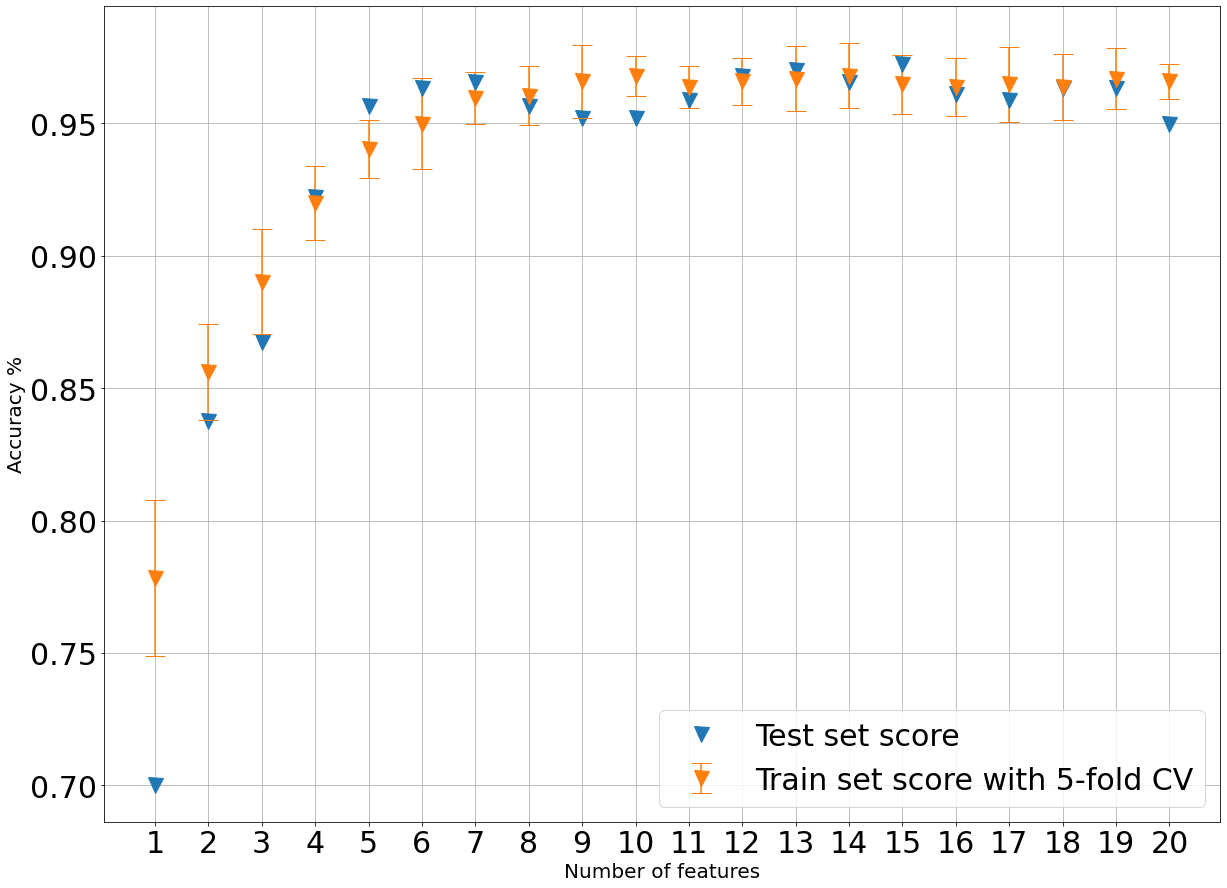

In [38]:
fig,ax = plt.subplots(1,1,figsize=(20,15))
ax.set_xlabel("Number of features",fontsize=20)
ax.set_ylabel("Accuracy %",fontsize=20)
features_number = np.arange(1,max_features+1)
ax.plot(features_number,test_scores, label='Test set score',marker='v',markersize=15,linestyle='none')
ax.errorbar(features_number,cv_scores, yerr=standard_deviation,label='Train set score with 5-fold CV',marker='v',markersize=15,linestyle='none',capsize=10)
ax.legend(fontsize=30)
ax.set_xticks(features_number)
ax.grid(True)
plt.rcParams.update({'font.size': 30})
print()
print("Best score over all: " + str(best_params_svm["score"]))
print("Features: " + str(best_params_svm["features"]))
svc = KNeighborsClassifier(n_neighbors=best_params_svm["n_neigh"],weights='distance',leaf_size=best_params_svm["leaf_size"])
svc.fit(X_train[:,best_params_svm["support"]],y_train)
###Accuracy on test set
y_pred = svc.predict(X_test[:,best_params_svm["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(f"Final score: {score}")
filename = 'Boresight_model_KNN_'
plt.savefig('Thesis_figures/'+filename+'Feature_VS_Accuracy',format='png')


In [39]:
import pandas as pd

df = pd.DataFrame.from_dict(scoring_by_n_features)
df.to_csv('Trained_stuff_KNN/'+'stats_'+filename+'.csv', sep='\t',index=False, header=True)

103


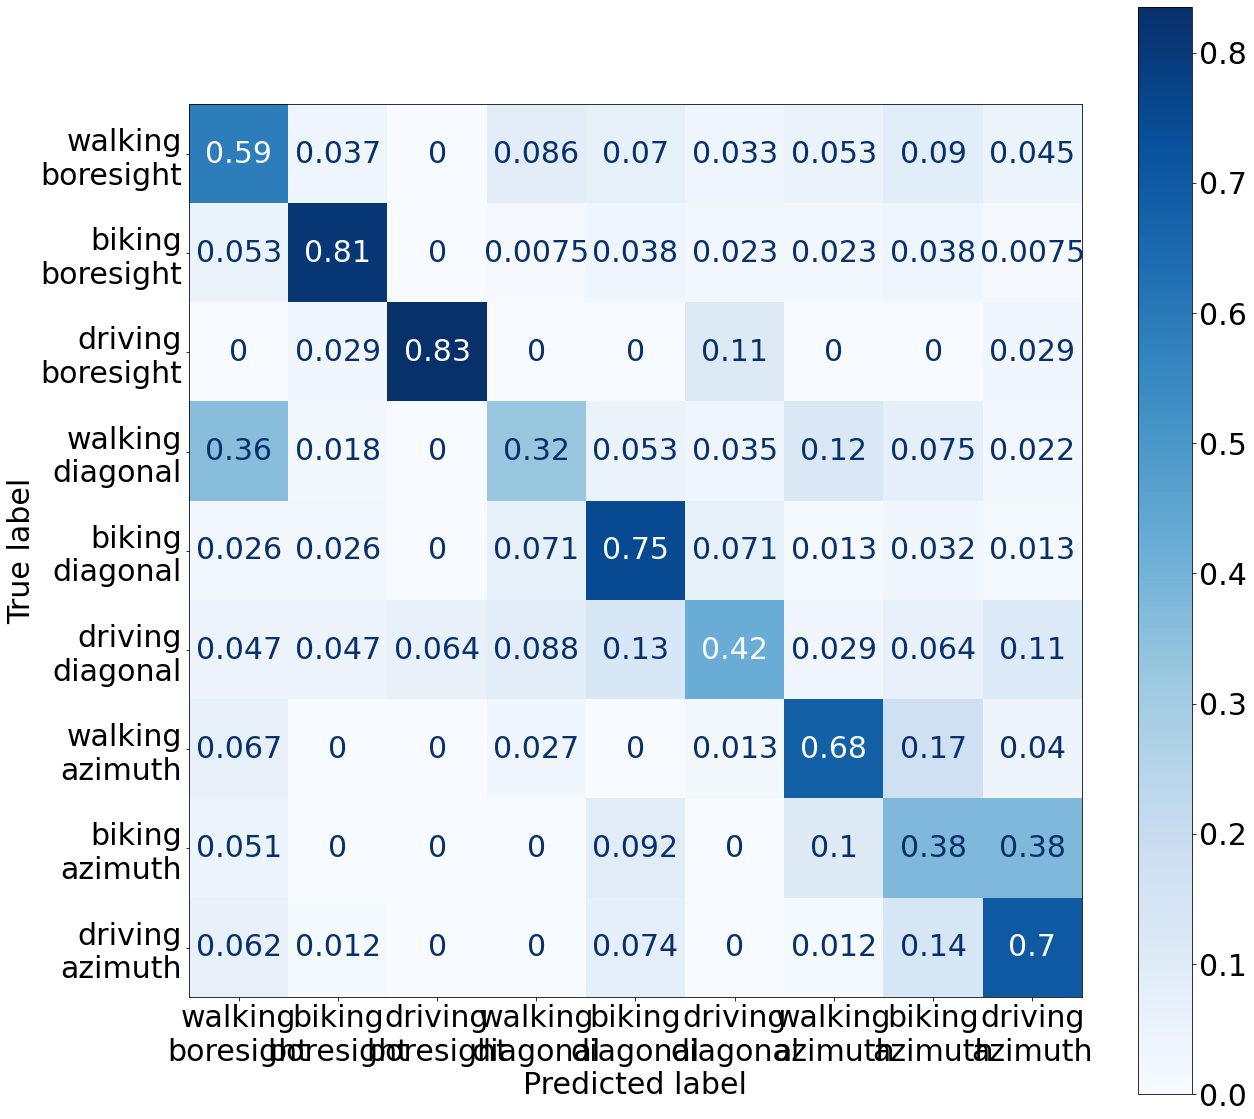

In [31]:
fig, ax = plt.subplots(figsize=(20, 20))
class_names = ['walking\nboresight','biking\nboresight','driving\nboresight',\
               'walking\ndiagonal','biking\ndiagonal','driving\ndiagonal',\
              'walking\nazimuth','biking\nazimuth','driving\nazimuth']
disp = plot_confusion_matrix(svc,X_test[:,best_params_svm["support"]],y_test,cmap=plt.cm.Blues,normalize='true',display_labels=class_names, ax=ax)
print(sum(y_test==2))


Best score over all: 0.7253694712337879
Features: ['location' 'var_dopp' 'SPC_Hi' 'strength' 'max_dev' 'SPC_Lo'
 'std_deviation' 'correlation' 'max_to_mean_distance' 'Lo_peak_count'
 'SPC_Mi' 'Mi_peak_count' 'Mi_skewness_difference'
 'Hi_skewness_difference' 'Side_lobe_strength' 'Side_lobe_max_strength'
 'SPC_Mi_variance']
Final score: 0.6345381526104418


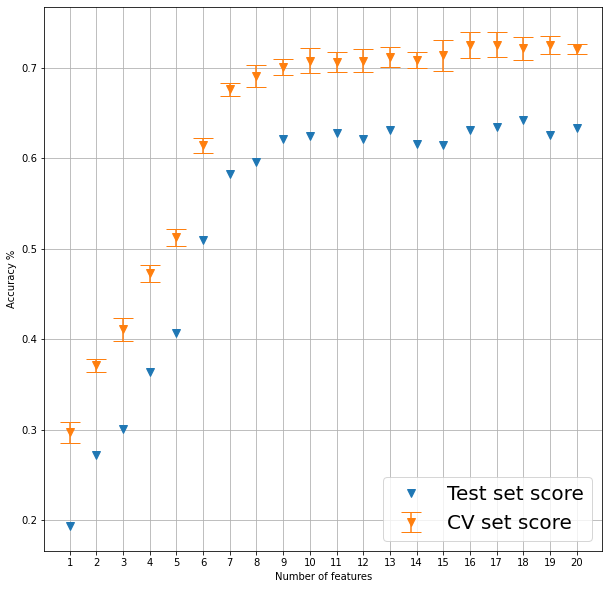

In [7]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.set_xlabel("Number of features")
ax.set_ylabel("Accuracy %")
features_number = np.arange(1,max_features+1)
ax.plot(features_number,test_scores, label='Test set score',marker='v',markersize=8,linestyle='none')
ax.errorbar(features_number,cv_scores, yerr=standard_deviation,label='CV set score',marker='v',markersize=8,linestyle='none',capsize=10)
ax.legend(fontsize=20)
ax.set_xticks(features_number)
ax.grid(True)
print()
print("Best score over all: " + str(overall_best_params_xgb["score"]))
print("Features: " + str(overall_best_params_xgb["features"]))
clf = xgb.XGBClassifier(objective='multi:softmax',eval_metric='rmsle',eta=overall_best_params_xgb['eta'],gamma=overall_best_params_xgb['gamma'],max_depth=overall_best_params_xgb['max_depth'],use_label_encoder=False)
clf.fit(X_train[:,overall_best_params_xgb["support"]],y_train)

###Accuracy on test set
y_pred = clf.predict(X_test[:,overall_best_params_xgb["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(f"Final score: {score}")

In [10]:
filename = 'diagonal_model.model'
clf.save_model(filename)

103


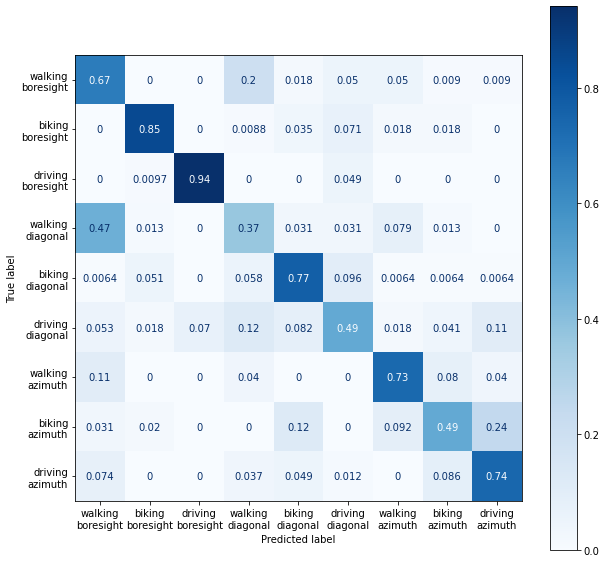

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
class_names = ['walking\nboresight','biking\nboresight','driving\nboresight',\
               'walking\ndiagonal','biking\ndiagonal','driving\ndiagonal',\
              'walking\nazimuth','biking\nazimuth','driving\nazimuth']
disp = plot_confusion_matrix(clf,X_test[:,overall_best_params_xgb["support"]],y_test,cmap=plt.cm.Blues,normalize='true',display_labels=class_names, ax=ax)
print(sum(y_test==2))

<ipython-input-9-dce64cd0750e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
<ipython-input-9-dce64cd0750e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+class_names,fontsize=20)


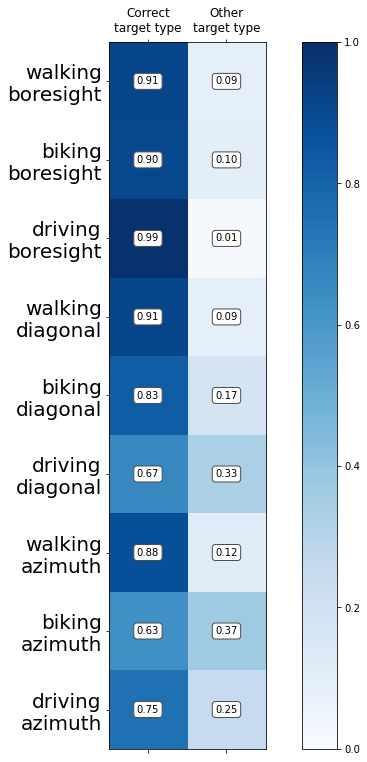

In [9]:
import matplotlib as mpl
ConfusionMatrix = metrics.confusion_matrix(y_test,y_pred, normalize='true')
confusion_results = [[0, 0] for i in range(len(ConfusionMatrix))]
for diag in range(len(ConfusionMatrix)):
    rolled_row = np.roll(ConfusionMatrix[diag],-diag)
    for column in range(len(ConfusionMatrix)):
        confusion_results[diag][int(column%3 != 0)] += rolled_row[column]
fig,ax = plt.subplots(1,1,figsize=(13,13))
cax = ax.matshow(confusion_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
_=ax.set_yticklabels(['']+class_names,fontsize=20)
for (i, j), z in np.ndenumerate(confusion_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))


<class 'xgboost.sklearn.XGBClassifier'>


XGBoostError: [09:41:34] /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1183: Check failed: learner_model_param_.num_feature >= p_fmat->Info().num_col_ (19 vs. 20) : Number of columns does not match number of features in booster.
Stack trace:
  [bt] (0) /home/coppolr/Desktop/Classification-Radar/env/lib/libxgboost.so(+0x9f738) [0x14aacbb6f738]
  [bt] (1) /home/coppolr/Desktop/Classification-Radar/env/lib/libxgboost.so(+0x1c7711) [0x14aacbc97711]
  [bt] (2) /home/coppolr/Desktop/Classification-Radar/env/lib/libxgboost.so(+0x1d1fa4) [0x14aacbca1fa4]
  [bt] (3) /home/coppolr/Desktop/Classification-Radar/env/lib/libxgboost.so(XGBoosterPredict+0xe7) [0x14aacbb75457]
  [bt] (4) /home/coppolr/Desktop/Classification-Radar/env/lib/python3.8/lib-dynload/../../libffi.so.7(+0x69dd) [0x14ab04bf49dd]
  [bt] (5) /home/coppolr/Desktop/Classification-Radar/env/lib/python3.8/lib-dynload/../../libffi.so.7(+0x6067) [0x14ab04bf4067]
  [bt] (6) /home/coppolr/Desktop/Classification-Radar/env/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x10da8) [0x14ab04c0ada8]
  [bt] (7) /home/coppolr/Desktop/Classification-Radar/env/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x1108c) [0x14ab04c0b08c]
  [bt] (8) /home/coppolr/Desktop/Classification-Radar/env/bin/python(_PyObject_MakeTpCall+0x22f) [0x562991b6285f]



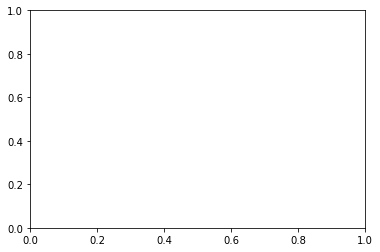

In [13]:
fig,ax = plt.subplots(1,1)
bst = xgb.XGBClassifier()  # init model
bst.load_model('Trained_stuff/'+filename)  # load data
print(type(bst))
y_pred = bst.predict(X_test[:,overall_best_params_xgb["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(score)
disp = plot_confusion_matrix(bst,X_test[:,overall_best_params_xgb["support"]],y_test,cmap=plt.cm.Blues,normalize='true',display_labels=class_names, ax=ax)

<ipython-input-25-f082db3982ab>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
<ipython-input-25-f082db3982ab>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+class_names,fontsize=20)


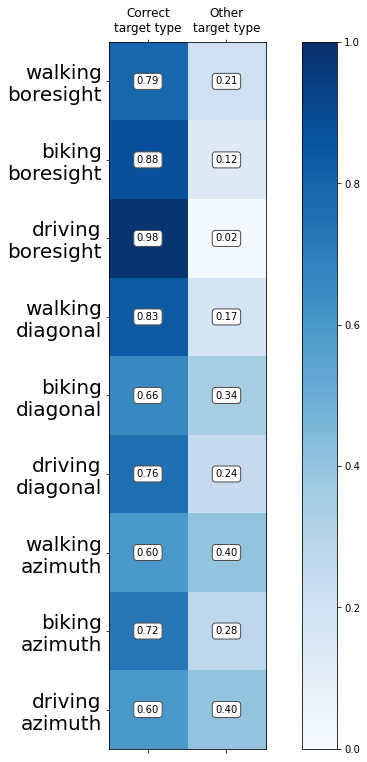

In [25]:
ConfusionMatrix = metrics.confusion_matrix(y_test,y_pred, normalize='true')
confusion_results = [[0, 0] for i in range(len(ConfusionMatrix))]
for diag in range(len(ConfusionMatrix)):
    rolled_row = np.roll(ConfusionMatrix[diag],-diag)
    for column in range(len(ConfusionMatrix)):
        confusion_results[diag][int(column%3 != 0)] += rolled_row[column]
fig,ax = plt.subplots(1,1,figsize=(13,13))
cax = ax.matshow(confusion_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
_=ax.set_yticklabels(['']+class_names,fontsize=20)
for (i, j), z in np.ndenumerate(confusion_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))


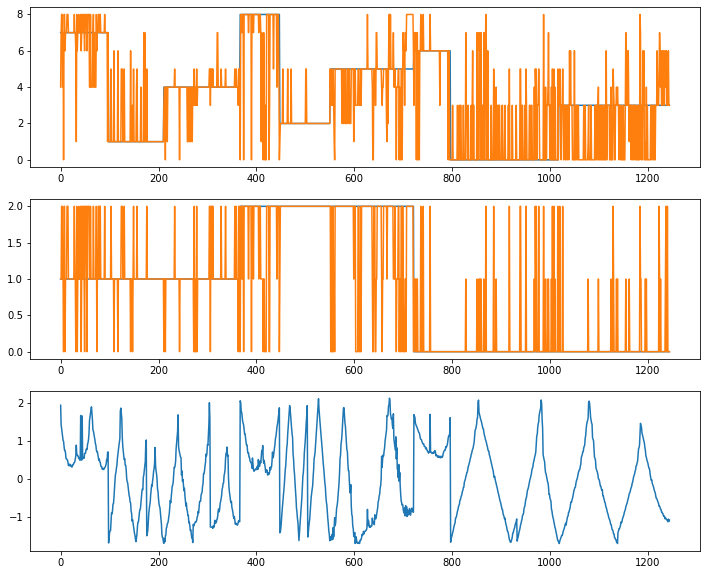

In [14]:
fig,ax = plt.subplots(3,1,figsize=[12,10])
ax[0].plot(y_test)
predictions = clf.predict(X_test[:,overall_best_params_xgb["support"]])
ax[0].plot(predictions)
y_test_converted = []
for y in y_test:
    if y == 0 or y == 3 or y == 6:
        y_test_converted.append(0)
    elif y == 1 or y == 4 or y == 7:
        y_test_converted.append(1)
    elif y == 2 or y == 5 or y == 8:
        y_test_converted.append(2)
        
predictions_converted = []
for pred in predictions:
    if pred == 0 or pred == 3 or pred == 6:
        predictions_converted.append(0)
    elif pred == 1 or pred == 4 or pred == 7:
        predictions_converted.append(1)
    elif pred == 2 or pred == 5 or pred == 8:
        predictions_converted.append(2)
    else:
        (print(pred))

ax[1].plot(y_test_converted)
ax[1].plot(predictions_converted)
ax[2].plot(X_test[:,0])

In [15]:
print(len(predictions_converted))

1245


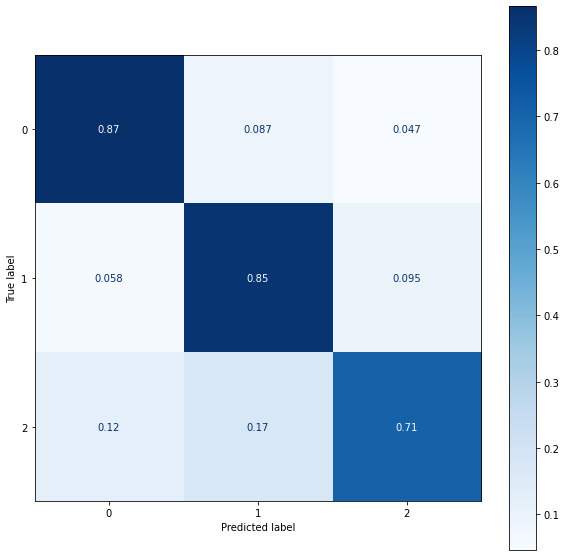

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
class_names = ['walkig\nboresight','biking\nboresight','driving\nboresight','walking\ndiagonal','biking\ndiagonal','driving\ndiagonal']
cm = metrics.confusion_matrix(y_test_converted,predictions_converted,normalize='true')
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues,ax=ax)

   Feature  Importance                    Name
0       f5         579                strength
1      f16         462           Range_profile
2       f0         460                location
3       f9         395             correlation
4      f10         372                  SPC_Mi
5      f14         367      Side_lobe_strength
6      f12         315  Mi_skewness_difference
7       f4         271                     MDR
8       f8         261           std_deviation
9      f13         260  Hi_skewness_difference
10      f1         245                var_dopp
11      f6         243                  SPC_Lo
12     f15         242         SPC_Mi_variance
13     f11         230   Lo_skewness_variation
14      f2         207                  SPC_Hi
15      f3         195                     SPD
16      f7          94              peak_count


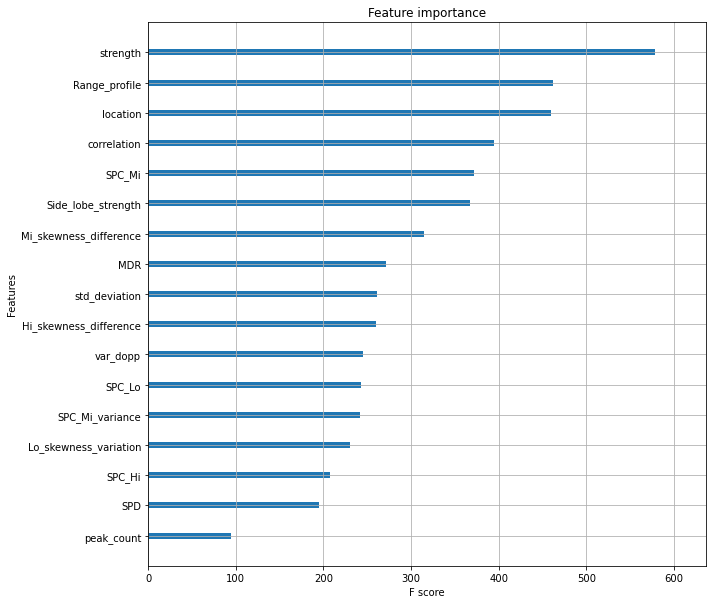

In [12]:
importance_type='weight'
fscores = clf.get_booster().get_score(importance_type=importance_type)
feat_importances = []

for ft, score in fscores.items():
    feat_importances.append({'Feature': ft, 'Importance': score, 'Name': overall_best_params_xgb["features"][int(ft[1:])]})
feat_importances = pd.DataFrame(feat_importances)
feat_importances = feat_importances.sort_values(
    by='Importance', ascending=False).reset_index(drop=True)
print(feat_importances)
feat_labels = []
for elem in feat_importances.values:
    feat_labels.append(elem[2])
feat_labels = np.flip(feat_labels)
fig,ax = plt.subplots(1,1,figsize=(10,10))
_=plot_importance(clf,ax=ax,importance_type=importance_type,show_values=False).set_yticklabels(feat_labels)

In [16]:
import pandas as pd
df = pd.DataFrame.from_dict(best_params_xgb)
df.to_csv('Boresight_Diagonal_Azimuth.csv', sep='\t',index=False, header=True)

# Load model

In [37]:
asd = pd.read_csv("Trained_stuff/Boresight_Diagonal_azimuth.csv",delimiter='\t')
d = asd.to_dict("split")

my_dictionary_list = []
for row_idx in range(len(d['data'])):
    for col_idx in range(len(d['columns'])):
        if d['columns'][col_idx] == 'support':
            split_bools = d['data'][row_idx][col_idx] = d['data'][row_idx][col_idx].replace("\n", "").replace("  "," ").replace("[","").replace("]","").split(" ")
            d['data'][row_idx][col_idx] = []
            for elem in split_bools:
                if elem == 'True':
                    d['data'][row_idx][col_idx].append(True)
                elif elem == 'False':
                    d['data'][row_idx][col_idx].append(False)
    best_params= dict(zip(d["columns"],d["data"][row_idx]))
    best_params[d['columns'][col_idx]] = d['data']
    my_dictionary_list.append(best_params)

In [38]:
overall_best_params_xgb = {'score':0}
standard_deviation = []
test_scores = []
cv_scores = []
u = 0
for elem in my_dictionary_list:
    u += 1
    print(f"Number of features: {u}")
    print(elem["features"])
    print(f"Cross-validation set score: {elem['score']}")
    if elem["score"] > overall_best_params_xgb["score"]:
        overall_best_params_xgb["score"] = elem["score"]
        overall_best_params_xgb["features"] = elem["features"]
        overall_best_params_xgb["max_depth"] = elem["max_depth"]
        overall_best_params_xgb["gamma"] = elem["gamma"]
        overall_best_params_xgb["eta"] = elem["eta"]
        overall_best_params_xgb["support"] = elem["support"]
    clf = xgb.XGBClassifier(objective='multi:softmax',eval_metric='rmsle',eta=elem['eta'],gamma=elem['gamma'],max_depth=elem['max_depth'],use_label_encoder=False)
    clf.fit(X_train[:,elem["support"]],y_train)
    y_pred = clf.predict(X_test[:,elem["support"]])
    score = metrics.accuracy_score(y_test, y_pred)
    standard_deviation.append(elem['standard_deviation'])
    test_scores.append(score)
    cv_scores.append(elem["score"])
 

Number of features: 1
['Mi_skewness_difference']
Cross-validation set score: 0.3267159960093116
Number of features: 2
['Mi_skewness_difference' 'Side_lobe_strength']
Cross-validation set score: 0.392991020951114
Number of features: 3
['Mi_skewness_difference' 'Hi_skewness_difference' 'Side_lobe_strength']
Cross-validation set score: 0.4365626870635184
Number of features: 4
['SPC_Mi' 'Mi_skewness_difference' 'Hi_skewness_difference'
 'Side_lobe_strength']
Cross-validation set score: 0.491488526770868
Number of features: 5
['location' 'SPC_Mi' 'Mi_skewness_difference' 'Hi_skewness_difference'
 'Side_lobe_strength']
Cross-validation set score: 0.5827712005320917
Number of features: 6
['location' 'strength' 'SPC_Mi' 'Mi_skewness_difference'
 'Hi_skewness_difference' 'Side_lobe_strength']
Cross-validation set score: 0.641315264383106
Number of features: 7
['location' 'var_dopp' 'strength' 'SPC_Mi' 'Mi_skewness_difference'
 'Hi_skewness_difference' 'Side_lobe_strength']
Cross-validation set 


Best score over all: 0.7264023944130362
Features: ['location' 'var_dopp' 'SPC_Hi' 'strength' 'max_dev' 'SPC_Lo'
 'std_deviation' 'harmonic_power_content' 'correlation'
 'max_to_mean_distance' 'Lo_peak_count' 'SPC_Mi' 'Hi_deviation'
 'Mi_peak_count' 'Mi_skewness_difference' 'Hi_skewness_difference'
 'Side_lobe_strength' 'Side_lobe_max_strength' 'SPC_Mi_variance']
Final score: 0.6305220883534136


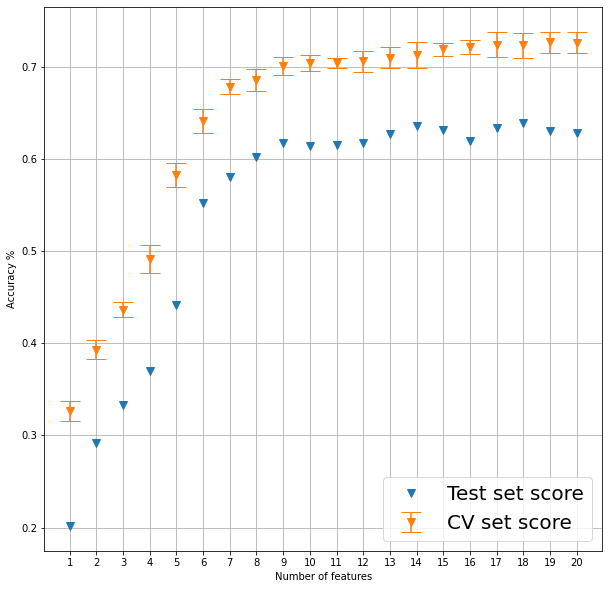

In [39]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.set_xlabel("Number of features")
ax.set_ylabel("Accuracy %")
features_number = np.arange(1,max_features+1)
ax.plot(features_number,test_scores, label='Test set score',marker='v',markersize=8,linestyle='none')
ax.errorbar(features_number,cv_scores, yerr=standard_deviation,label='CV set score',marker='v',markersize=8,linestyle='none',capsize=10)
ax.legend(fontsize=20)
ax.set_xticks(features_number)
ax.grid(True)
print()
print("Best score over all: " + str(overall_best_params_xgb["score"]))
print("Features: " + str(overall_best_params_xgb["features"]))
clf = xgb.XGBClassifier(objective='multi:softmax',eval_metric='rmsle',eta=overall_best_params_xgb['eta'],gamma=overall_best_params_xgb['gamma'],max_depth=overall_best_params_xgb['max_depth'],use_label_encoder=False)
clf.fit(X_train[:,overall_best_params_xgb["support"]],y_train)

###Accuracy on test set
y_pred = clf.predict(X_test[:,overall_best_params_xgb["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(f"Final score: {score}")

0.6305220883534136


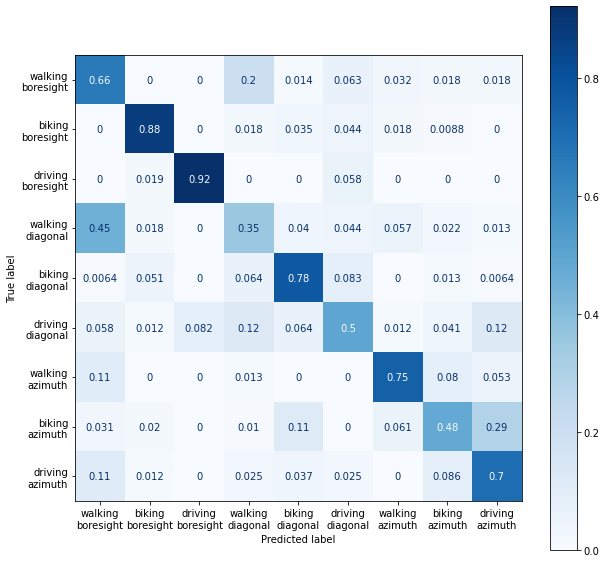

In [40]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
y_pred = clf.predict(X_test[:,overall_best_params_xgb["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(score)
disp = plot_confusion_matrix(clf,X_test[:,overall_best_params_xgb["support"]],y_test,cmap=plt.cm.Blues,normalize='true',display_labels=class_names, ax=ax)

<ipython-input-36-f082db3982ab>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
<ipython-input-36-f082db3982ab>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+class_names,fontsize=20)


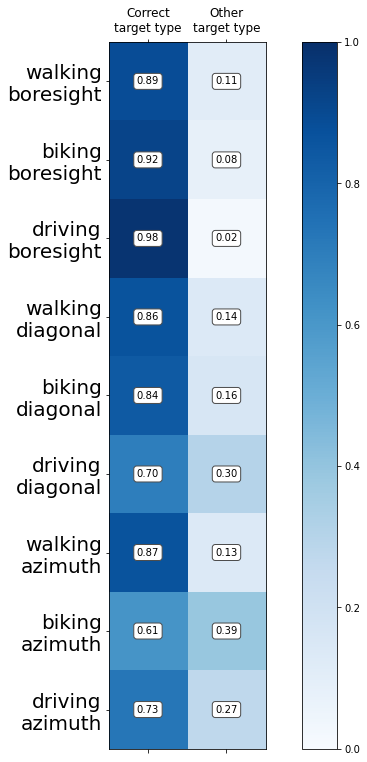

In [36]:
ConfusionMatrix = metrics.confusion_matrix(y_test,y_pred, normalize='true')
confusion_results = [[0, 0] for i in range(len(ConfusionMatrix))]
for diag in range(len(ConfusionMatrix)):
    rolled_row = np.roll(ConfusionMatrix[diag],-diag)
    for column in range(len(ConfusionMatrix)):
        confusion_results[diag][int(column%3 != 0)] += rolled_row[column]
fig,ax = plt.subplots(1,1,figsize=(13,13))
cax = ax.matshow(confusion_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
_=ax.set_yticklabels(['']+class_names,fontsize=20)
for (i, j), z in np.ndenumerate(confusion_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
